# Sintetičko generiranje podataka

## Početno postavljanje

In [ ]:
! pip install pytorch-pretrained-biggan

  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.4
    Uninstalling urllib3-2.0.4:
      Successfully uninstalled urllib3-2.0.4


In [ ]:
import numpy as np, pandas as pd, os
import os, torch, gc
from PIL import Image
import matplotlib.pyplot as plt
from pytorch_pretrained_biggan import BigGAN, truncated_noise_sample

# Učitavanje pretreniranog modela
model = BigGAN.from_pretrained('biggan-deep-256')

100%|██████████| 715/715 [00:00<00:00, 2589747.29B/s]


In [ ]:
# Provjera postojanja direktorija za spremanje
output_dir = '/content/synthetic_cat_samples'
os.makedirs(output_dir, exist_ok=True)

## Generiranje fotografija

In [ ]:
# Parametar koji nagrađuje varijaciju primjera (veći broj znači raznolikije instance, ali manje realistične i obrnuto)
truncation = 1.0

# Petlja za generiranje fotografija
for k in range(9):
    SAMPLES = 100
    class_vector = np.zeros((SAMPLES, 1000), dtype=np.float32)
    class_vector[:, 281] = 1  # 281 je klasa mačaka u ImageNet-u nad kojim je Big GAN treniran

    # Generiranje vektora šuma
    noise_vector = truncated_noise_sample(truncation=truncation, batch_size=SAMPLES)

    # Konverzija vektora šuma i vektora klase u tenzor
    noise_vector = torch.Tensor(noise_vector)
    class_vector = torch.Tensor(class_vector)

    # Generiranje fotografija
    with torch.no_grad():
        output = model(noise_vector, class_vector, truncation)


    output = output.numpy().transpose(0, 2, 3, 1)

    # Spremanje fotografija
    for j in range(100):
        img = Image.fromarray(((output[j,] + 1.) / 2. * 255).astype('uint8'))
        img.save(f'{output_dir}/cat.{k * 100 + j + 10000}.jpg', 'JPEG')

    print(f"{(k + 1) * 100} fotografija generirano i spremljeno.")

print("Sve fotografije su generirane.")


100 fotografija generirano i spremljeno.
200 fotografija generirano i spremljeno.
300 fotografija generirano i spremljeno.
400 fotografija generirano i spremljeno.
500 fotografija generirano i spremljeno.
600 fotografija generirano i spremljeno.
700 fotografija generirano i spremljeno.
800 fotografija generirano i spremljeno.
900 fotografija generirano i spremljeno.
Sve fotografije su generirane.


## Kompresija generiranih sintetičkih fotografija

In [ ]:
# Samo zip datoteke mogu biti preuzete iz Colaba
!zip -r synthetic_cat_samples.zip synthetic_cat_samples/

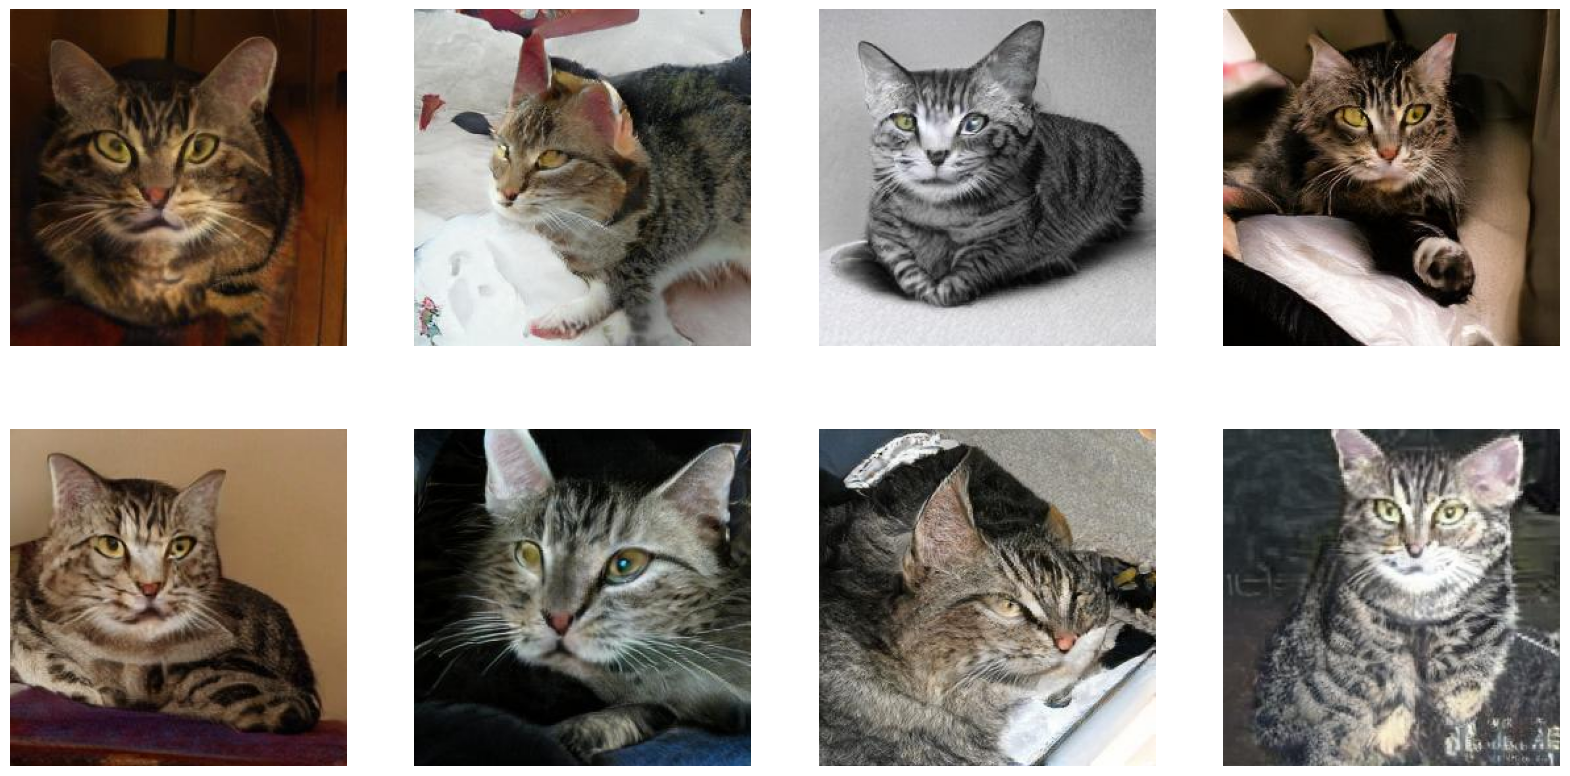

In [4]:
import zipfile
import random
from PIL import Image
import matplotlib.pyplot as plt
import io

# Path to the ZIP file
zip_path = "/content/synthetic_cat_samples.zip"

# List to store image names
image_names = []

# Open the ZIP file and read its content
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    image_names = [name for name in zip_ref.namelist() if name.endswith('.jpg')]

# Randomly sample 8 image names
sampled_names = random.sample(image_names, 8)

# Create a new figure for displaying images
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Open the ZIP file again to extract and display images
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for ax, name in zip(axes.flatten(), sampled_names):

        with zip_ref.open(name) as file:
            img_data = io.BytesIO(file.read())
            img = Image.open(img_data)
            ax.imshow(img)
            ax.axis('off')

plt.show()
